In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from pathlib import Path

In [2]:
import matplotlib as mpl

mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
})


In [3]:
OEM8_HEX = {
    1: "#800000",  # Bareland
    2: "#00FF24",  # Rangeland
    3: "#949494",  # Developed space
    4: "#FFFFFF",  # Road
    5: "#226126",  # Tree
    6: "#0045FF",  # Water
    7: "#4BB549",  # Agriculture land
    8: "#DE1F07",  # Building
}

OEM8_NAMES = {
    1: "Bareland",
    2: "Rangeland",
    3: "Developed space",
    4: "Road",
    5: "Tree",
    6: "Water",
    7: "Agriculture land",
    8: "Building",
}

PLOT_IDS = list(OEM8_NAMES.keys())
LABELS = [OEM8_NAMES[k] for k in PLOT_IDS]
Y = np.arange(len(PLOT_IDS))


In [4]:
from pathlib import Path
import os

p = Path.cwd().resolve()
for _ in range(10):
    if (p / "data").is_dir() and (p / "scripts").is_dir():
        REPO_ROOT = p
        break
    p = p.parent

os.chdir(REPO_ROOT)

OEM_RAW_ROOT = (
    REPO_ROOT /
    "data/openearthmap_raw/OpenEarthMap/OpenEarthMap_wo_xBD"
)

assert OEM_RAW_ROOT.exists(), "OEM raw dataset not found"
print("OEM raw root:", OEM_RAW_ROOT)


OEM raw root: /home/lainey/Documents/Github/ClassImbalance/data/openearthmap_raw/OpenEarthMap/OpenEarthMap_wo_xBD


In [5]:
label_paths = sorted(OEM_RAW_ROOT.glob("*/labels/*.tif"))
print("Total label files:", len(label_paths))

assert len(label_paths) > 0, "No OEM raw label TIFFs found"


Total label files: 3500


In [6]:
tile_counts = {k: 0 for k in PLOT_IDS}
pixel_counts = {k: 0 for k in PLOT_IDS}
total_pixels = 0

for p in label_paths:
    with rasterio.open(p) as src:
        mask = src.read(1)

    total_pixels += mask.size
    unique = np.unique(mask)

    for k in PLOT_IDS:
        if k in unique:
            tile_counts[k] += 1
        pixel_counts[k] += np.sum(mask == k)

n_tiles = len(label_paths)

tile_proportion = np.array([tile_counts[k] / n_tiles for k in PLOT_IDS])
pixel_proportion = np.array([pixel_counts[k] / total_pixels for k in PLOT_IDS])

print("Tile proportions:", tile_proportion)
print("Pixel proportions:", pixel_proportion)


Tile proportions: [0.16828571 0.98085714 0.96085714 0.93914286 0.99057143 0.544
 0.42914286 0.97085714]
Pixel proportions: [0.0148836  0.22472687 0.16005147 0.06657943 0.20028756 0.03246027
 0.13798909 0.15648212]


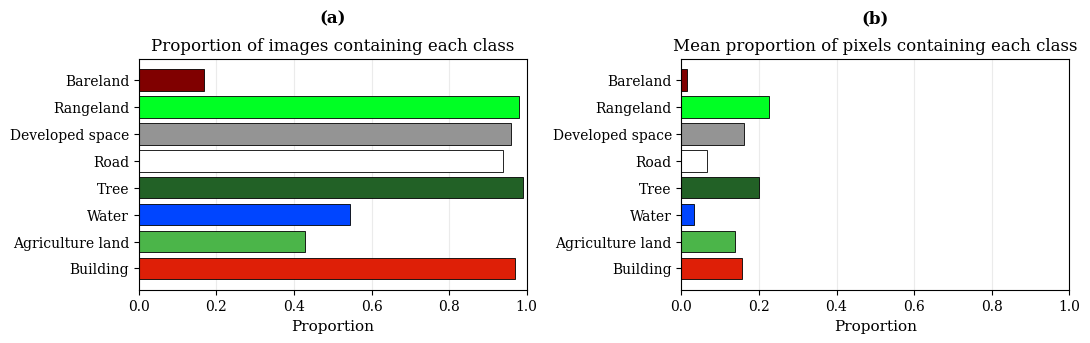

Saved: /home/lainey/Documents/Github/ClassImbalance/outputs/figures/fig2a_oem_distribution.pdf


In [ ]:
fig, axes = plt.subplots(
    nrows=1, ncols=2,
    figsize=(11, 3.6)
)

fig.subplots_adjust(wspace=0.25)

# (a) tile presence
ax = axes[0]
ax.barh(
    Y,
    tile_proportion,
    color=[OEM8_HEX[k] for k in PLOT_IDS],
    edgecolor="black",
    linewidth=0.6
)
ax.set_yticks(Y)
ax.set_yticklabels(LABELS)
ax.invert_yaxis()
ax.set_xlim(0, 1)
ax.set_xlabel("Proportion")
ax.set_title("Proportion of images containing each class")
ax.text(0.5, 1.14, "(a)", transform=ax.transAxes,
        ha="center", va="bottom", fontsize=12, fontweight="bold")
ax.grid(True, axis="x", alpha=0.25)
ax.set_axisbelow(True)

# (b) pixel proportion
ax = axes[1]
ax.barh(
    Y,
    pixel_proportion,
    color=[OEM8_HEX[k] for k in PLOT_IDS],
    edgecolor="black",
    linewidth=0.6
)
ax.set_yticks(Y)
ax.set_yticklabels(LABELS)
ax.invert_yaxis()
ax.set_xlim(0, 1)
ax.set_xlabel("Proportion")
ax.set_title("Mean proportion of pixels containing each class")
ax.text(0.5, 1.14, "(b)", transform=ax.transAxes,
        ha="center", va="bottom", fontsize=12, fontweight="bold")
ax.grid(True, axis="x", alpha=0.25)
ax.set_axisbelow(True)


out_path = REPO_ROOT / "figures/fig2a_oem_distribution.pdf"
out_path.parent.mkdir(parents=True, exist_ok=True)

fig.tight_layout()
fig.savefig(out_path, bbox_inches="tight")
plt.show()

print("Saved:", out_path)
